<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/Visuals_for_an_audience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

death_toll = pd.read_csv('/content/drive/MyDrive/Dataset/top20_deathtoll.csv')


In [4]:
print(death_toll)


   Country_Other  Total_Deaths
0         Turkey       15103.0
1          Chile       15663.0
2        Belgium       17386.0
3      Indonesia       18000.0
4        Germany       19539.0
5         Poland       20592.0
6   South Africa       22249.0
7           Peru       36324.0
8       Colombia       37995.0
9      Argentina       39888.0
10        Russia       44159.0
11         Spain       46646.0
12          Iran       50917.0
13        France       55521.0
14         Italy       60606.0
15            UK       61434.0
16        Mexico      110074.0
17         India      141005.0
18        Brazil      177388.0
19           USA      290798.0


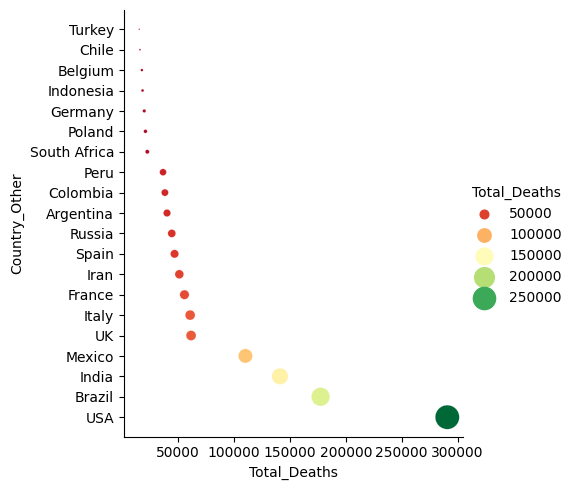

In [5]:
sns.relplot(data=death_toll, x='Total_Deaths', y='Country_Other', size='Total_Deaths', 
            sizes=(1,300), hue='Total_Deaths', palette='RdYlGn')

In [6]:
!pip install pycountry pycountry-convert pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 52.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 14.2 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=f6375c780d6eba0d85df03b5a6ba90e45e5fc2b94c1d650091c52b4fff5df2e0
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [7]:
import pycountry
import pycountry_convert as pc
import pandas as pd

def country_to_continent(country_name):
    country_alpha2 = pycountry.countries.get(name=country_name).alpha_2
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


In [8]:
df = pd.DataFrame({
    'Country': ['France', 'Germany', 'Nigeria', 'Argentina', 'Australia', 'Canada', 'China']
})

df['Continent'] = df['Country'].apply(country_to_continent)
print(df)


     Country      Continent
0     France         Europe
1    Germany         Europe
2    Nigeria         Africa
3  Argentina  South America
4  Australia        Oceania
5     Canada  North America
6      China           Asia


In [9]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pycountry.countries.get(name=country_name).alpha_2
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "Unknown"

death_toll['Continent'] = death_toll['Country_Other'].apply(country_to_continent)


In [10]:
print(death_toll.head())

  Country_Other  Total_Deaths      Continent
0        Turkey       15103.0           Asia
1         Chile       15663.0  South America
2       Belgium       17386.0         Europe
3     Indonesia       18000.0           Asia
4       Germany       19539.0         Europe


In [11]:
by_asia = death_toll['Continent'] == 'Asia'


In [12]:
death_toll['Continent'].value_counts()

Europe           6
South America    5
Unknown          4
Asia             3
Africa           1
North America    1
Name: Continent, dtype: int64

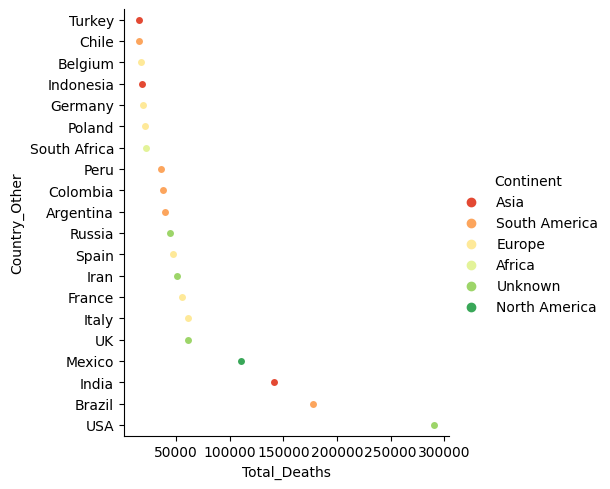

In [13]:
sns.catplot(data=death_toll, x='Total_Deaths', y='Country_Other', palette='RdYlGn', hue='Continent')

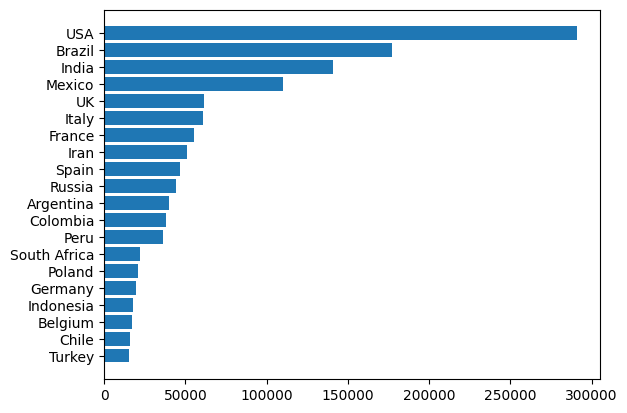

In [14]:
plt.barh(death_toll['Country_Other'],
         death_toll['Total_Deaths'])
plt.show()

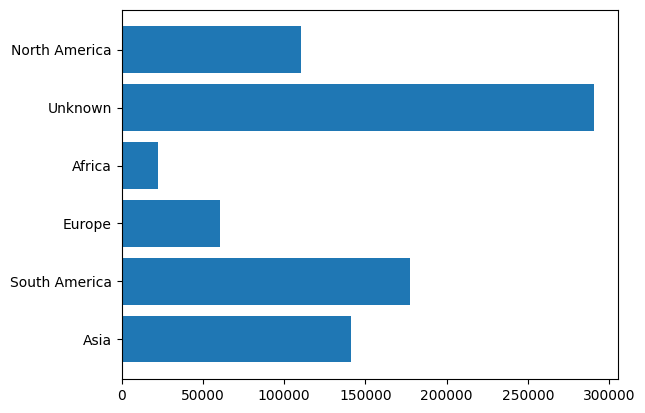

In [15]:
plt.barh(death_toll['Continent'],
         death_toll['Total_Deaths'])
plt.show()

In [16]:
death_toll.head(30)

,Country_Other,Total_Deaths,Continent
0,Turkey,15103.0,Asia
1,Chile,15663.0,South America
2,Belgium,17386.0,Europe
3,Indonesia,18000.0,Asia
4,Germany,19539.0,Europe
5,Poland,20592.0,Europe
6,South Africa,22249.0,Africa
7,Peru,36324.0,South America
8,Colombia,37995.0,South America
9,Argentina,39888.0,South America


In [17]:
country_mapping = {
    "Russia": "Russian Federation",
    "Iran": "Iran, Islamic Republic of",
    "UK": "United Kingdom",
    "USA": "United States",
}


In [18]:
def country_to_continent(country_name):
    if country_name in country_mapping:
        country_name = country_mapping[country_name]
    try:
        country_alpha2 = pycountry.countries.get(name=country_name).alpha_2
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "Unknown"


In [19]:
death_toll['Continent'] = death_toll['Country_Other'].apply(country_to_continent)


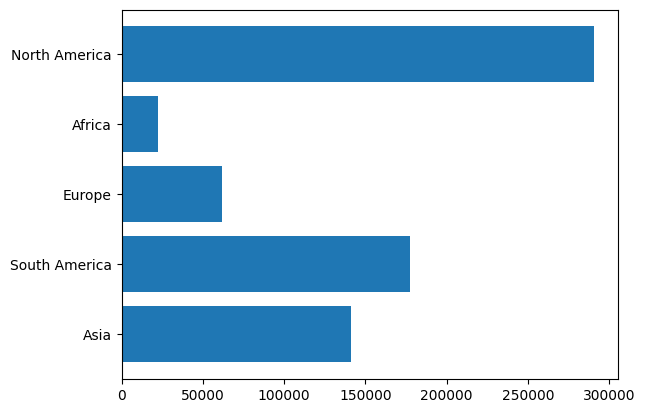

In [20]:
plt.barh(death_toll['Continent'],
         death_toll['Total_Deaths'])
plt.show()

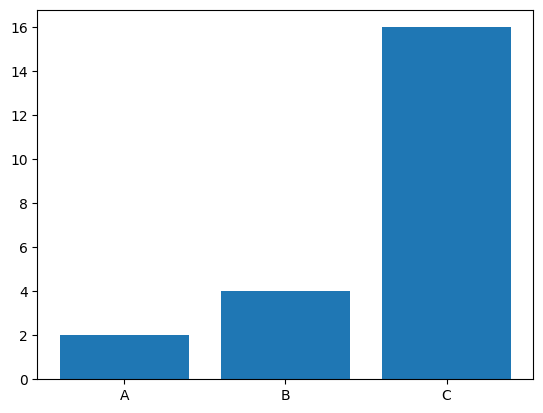

In [21]:
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
plt.show()

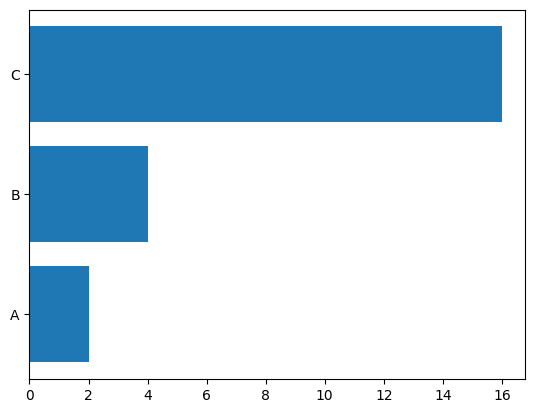

In [22]:
fig, ax = plt.subplots()
ax.barh(['A', 'B', 'C'],
       [2, 4, 16])
plt.show()

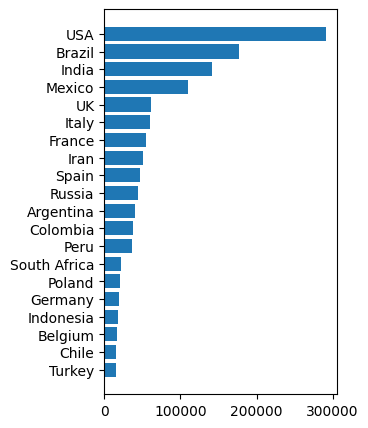

In [23]:
fig, ax = plt.subplots(figsize=(3,5))
ax.barh(death_toll['Country_Other'],
        death_toll['Total_Deaths'])
plt.show()

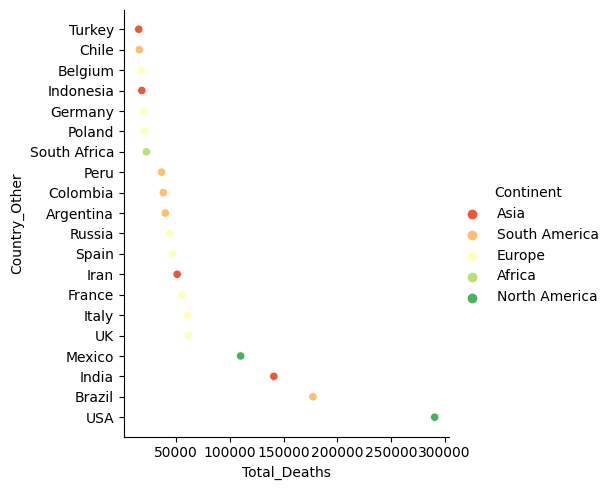

In [24]:
sns.relplot(data=death_toll, x='Total_Deaths', y='Country_Other', palette='RdYlGn', hue='Continent')

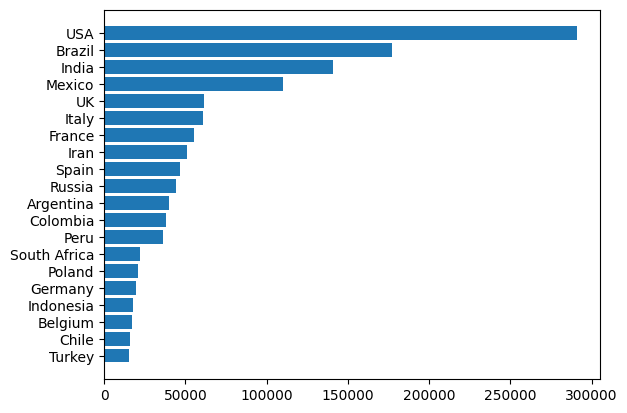

In [25]:
plt.barh(death_toll['Country_Other'],
         death_toll['Total_Deaths'])
plt.show()

Using the MatplotLib Object Orientated Interface as opposed to just the functional interface gives us far more options and customability. When creating graphs and charts for an audience this give us greater functionality and options.

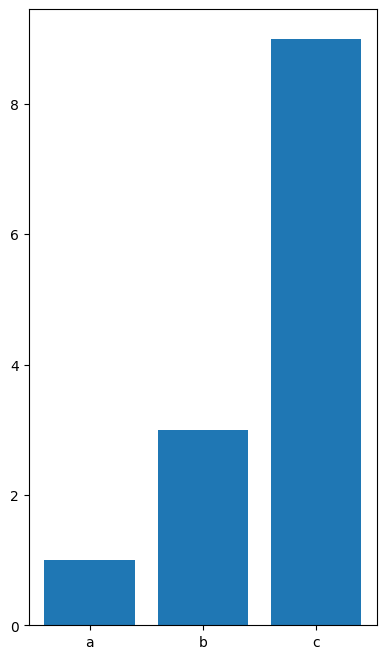

In [26]:
fix, ax = plt.subplots(figsize=(4.5,8))
ax.bar(['a', 'b', 'c'],
       [1, 3, 9]),     
plt.show()

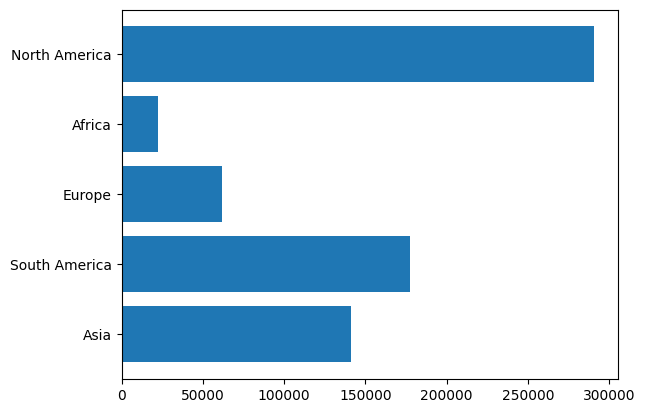

In [27]:
fix, ax = plt.subplots()
ax.barh(death_toll['Continent'], 
       death_toll['Total_Deaths'])
plt.show()

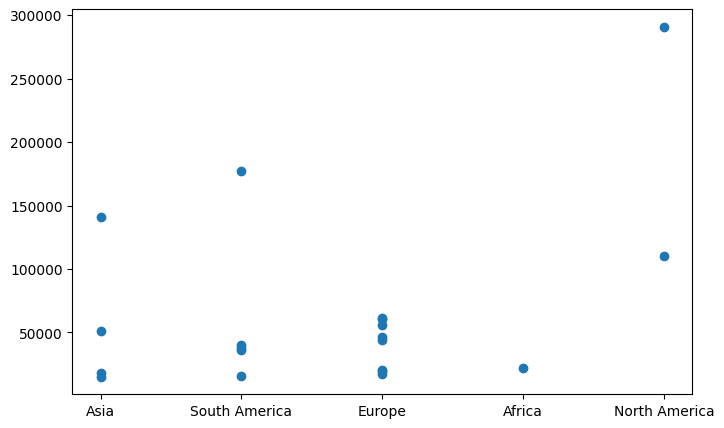

In [28]:
fix, ax = plt.subplots(figsize=(8,5))
ax.scatter(death_toll['Continent'], 
       death_toll['Total_Deaths'])
plt.show()

ax.spines[location] allows us set borders and lines visible in these locations.

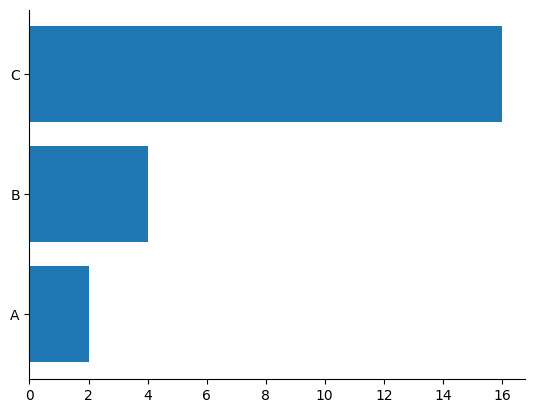

In [29]:
fig, ax = plt.subplots()
ax.barh(['A', 'B', 'C'],
       [2, 4, 16])
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

If we want to hide them all using a for loop requires only two lines of code as opposed to 4. 

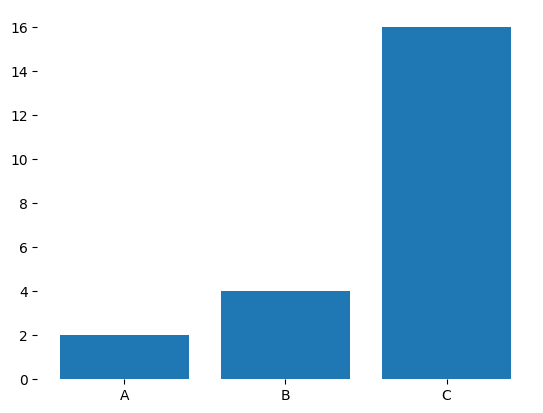

In [30]:
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
for location in ['left', 'right', 'top', 'bottom']:
  ax.spines[location].set_visible(False)
plt.show()

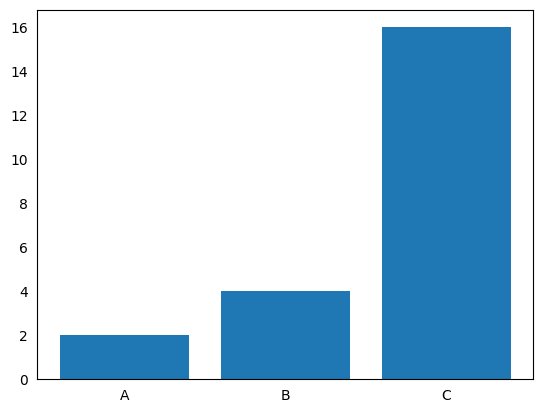

In [31]:
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])

ax.tick_params(bottom=False, left=False)
plt.show()

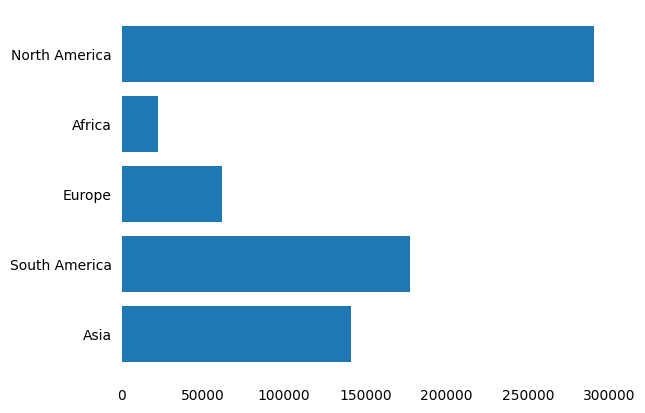

In [32]:
fix, ax = plt.subplots()
ax.barh(death_toll['Continent'], 
       death_toll['Total_Deaths'])
for location in ['top', 'bottom', 'left', 'right']:
  ax.spines[location].set_visible(False)
ax.tick_params(bottom=False, left=False)

plt.show()

<BarContainer object of 20 artists>

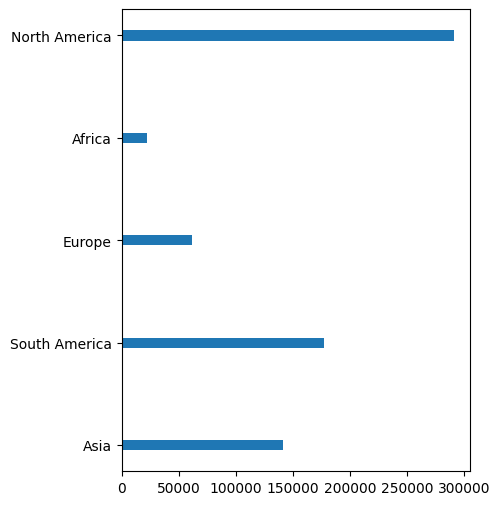

In [33]:
fix, ax = plt.subplots(figsize=(4.5,6))
ax.barh(death_toll['Continent'], 
       death_toll['Total_Deaths'],
       height=.1)

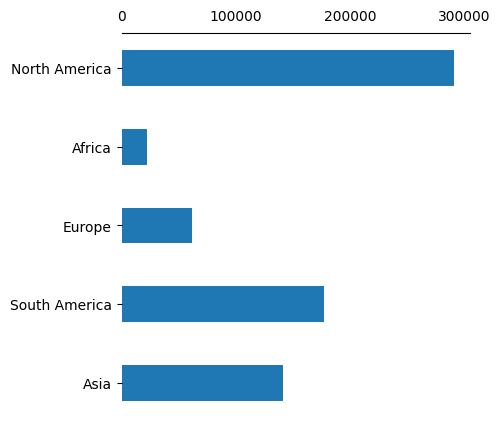

In [34]:
fix, ax = plt.subplots(figsize=(4.5,5))
ax.barh(death_toll['Continent'], 
       death_toll['Total_Deaths'],
       height=.45)
ax.set_xticks([0, 100000, 200000, 300000])
for location in ['right', 'left', 'bottom']:
  ax.spines[location].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(top=False, left=True)

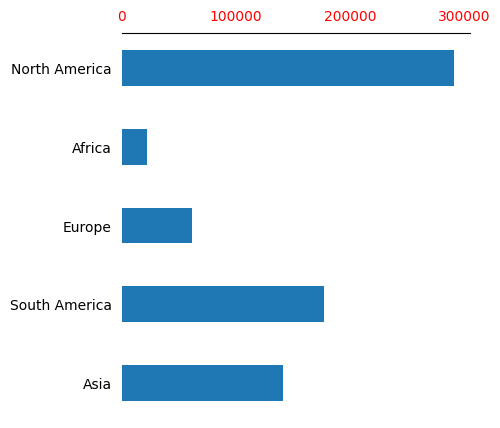

In [35]:
fix, ax = plt.subplots(figsize=(4.5,5))
ax.barh(death_toll['Continent'], 
       death_toll['Total_Deaths'],
       height=.45)
ax.set_xticks([0, 100000, 200000, 300000])
for location in ['right', 'left', 'bottom']:
  ax.spines[location].set_visible(False)

ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='red')

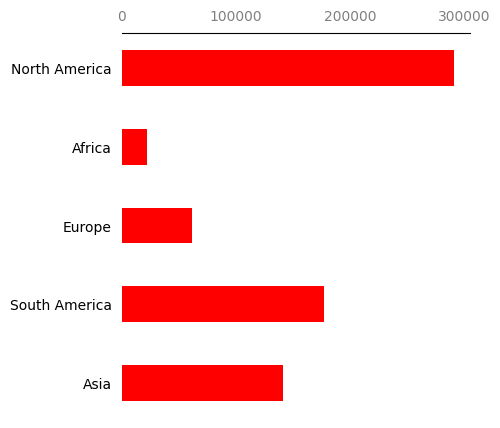

In [36]:
fix, ax = plt.subplots(figsize=(4.5,5))
ax.barh(death_toll['Continent'], 
       death_toll['Total_Deaths'],
       height=.45, color='red')
ax.set_xticks([0, 100000, 200000, 300000])
for location in ['right', 'left', 'bottom']:
  ax.spines[location].set_visible(False)

ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')

takes hex color code inputs - **resource:**
https://www.color-hex.com

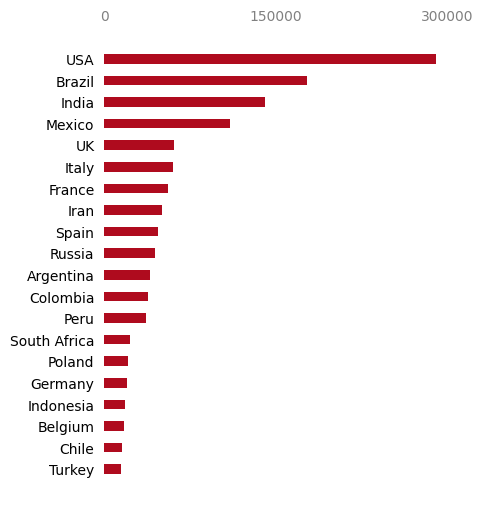

In [37]:
fix, ax = plt.subplots(figsize=(4.5,6))
ax.barh(death_toll['Country_Other'], 
       death_toll['Total_Deaths'],
       height=.45, color='#af0b1e')
ax.set_xticks([0, 150000, 300000])
for location in ['right', 'left', 'bottom', 'top']:
  ax.spines[location].set_visible(False)

ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')


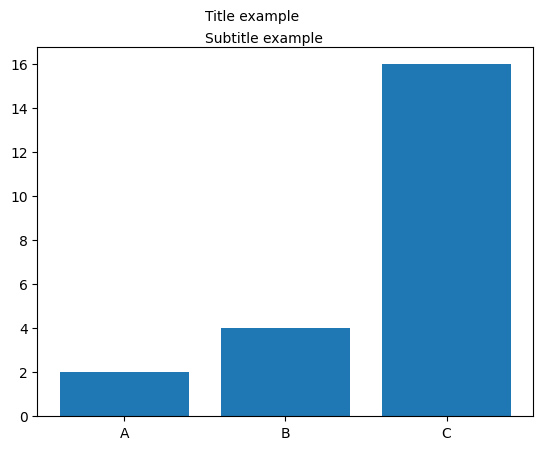

In [38]:
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
ax.text(x=.5, y=18, s='Title example')
ax.text(x=0.5, y=17, s='Subtitle example')
plt.show()

axes.text method contains x and y coordinate, where we place our text relative to our x and y axis'. We can also use size and weight to change our text and make it bold for example.

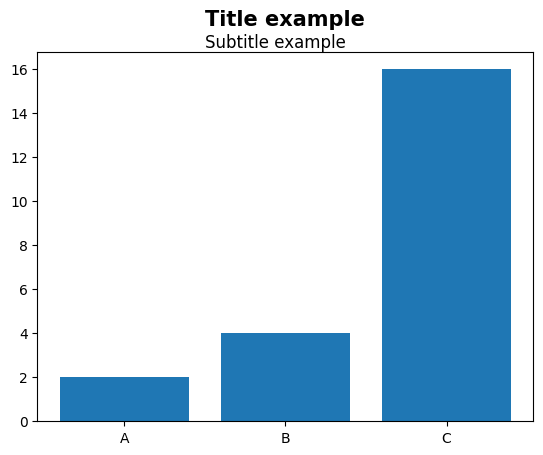

In [39]:
fig, ax = plt.subplots()
ax.bar(['A', 'B', 'C'],
       [2, 4, 16])
ax.text(x=0.5, y=18, s='Title example',
        size=15, weight='bold')
ax.text(x=0.5, y=17, s='Subtitle example',
        size=12)
plt.show()

Text(-80000, 22.5, 'Top 20 countries by death toll (December 2020)')

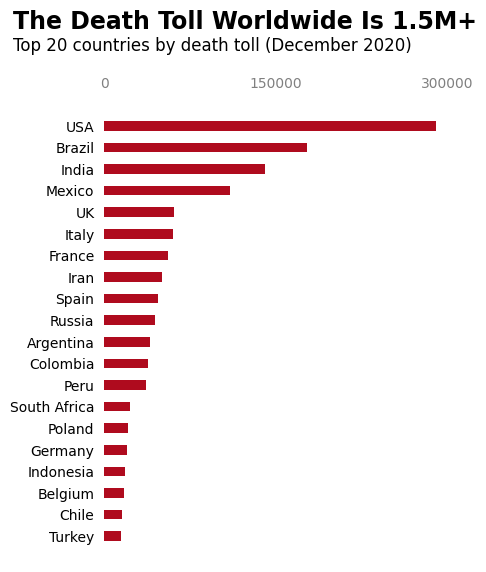

In [44]:
fix, ax = plt.subplots(figsize=(4.5,6))
ax.barh(death_toll['Country_Other'], 
       death_toll['Total_Deaths'],
       height=.45, color='#af0b1e')
ax.set_xticks([0, 150000, 300000])
for location in ['right', 'left', 'bottom', 'top']:
  ax.spines[location].set_visible(False)

ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+',
        size=17, weight='bold')
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)',
        size=12)


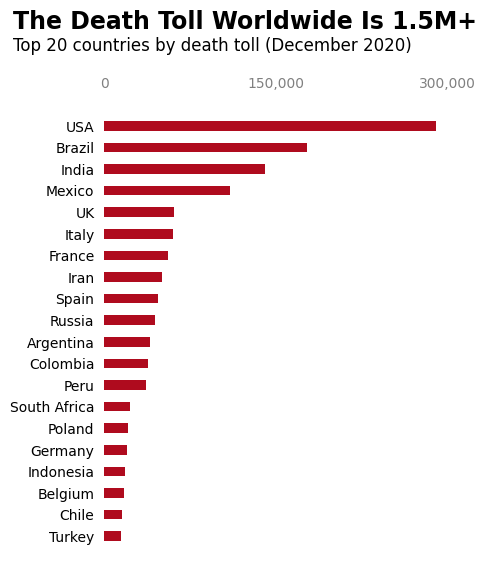

In [46]:

fix, ax = plt.subplots(figsize=(4.5,6))
ax.barh(death_toll['Country_Other'], 
       death_toll['Total_Deaths'],
       height=.45, color='#af0b1e')
ax.set_xticks([0, 150000, 300000])
for location in ['right', 'left', 'bottom', 'top']:
  ax.spines[location].set_visible(False)

ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+',
        size=17, weight='bold')
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)',
        size=12)
ax.set_xticklabels(['0', '150,000', '300,000'])
plt.show()

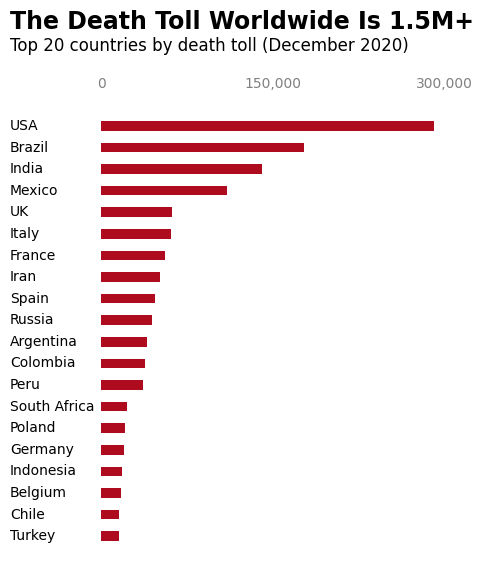

In [47]:

fix, ax = plt.subplots(figsize=(4.5,6))
ax.barh(death_toll['Country_Other'], 
       death_toll['Total_Deaths'],
       height=.45, color='#af0b1e')
ax.set_xticks([0, 150000, 300000])
for location in ['right', 'left', 'bottom', 'top']:
  ax.spines[location].set_visible(False)

ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+',
        size=17, weight='bold')
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)',
        size=12)
ax.set_xticklabels(['0', '150,000', '300,000'])


# Assume the rest of the code is written
ax.set_yticklabels([]) # an empty list removes the labels
country_names = death_toll['Country_Other']
for i, country in zip(range(len(death_toll['Country_Other'])), country_names):
    ax.text(x=-80000, y=i-0.175, s=country)


plt.show()

In [48]:
print(len(death_toll['Country_Other']))

20


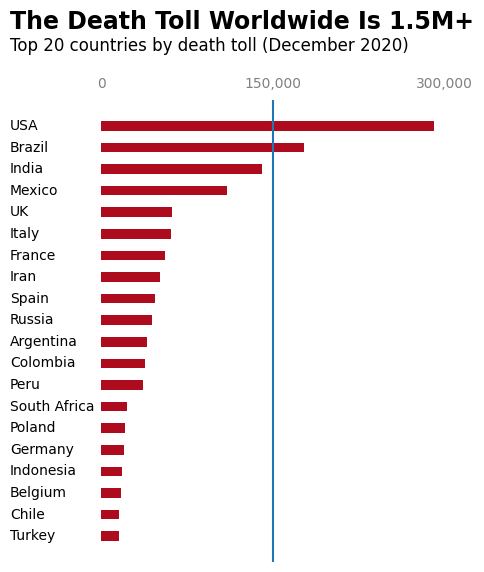

In [49]:

fix, ax = plt.subplots(figsize=(4.5,6))
ax.barh(death_toll['Country_Other'], 
       death_toll['Total_Deaths'],
       height=.45, color='#af0b1e')
ax.set_xticks([0, 150000, 300000])
for location in ['right', 'left', 'bottom', 'top']:
  ax.spines[location].set_visible(False)

ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+',
        size=17, weight='bold')
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)',
        size=12)
ax.set_xticklabels(['0', '150,000', '300,000'])


# Assume the rest of the code is written
ax.set_yticklabels([]) # an empty list removes the labels
country_names = death_toll['Country_Other']
for i, country in zip(range(len(death_toll['Country_Other'])), country_names):
    ax.text(x=-80000, y=i-0.175, s=country)
ax.axvline(x=150000)

plt.show()




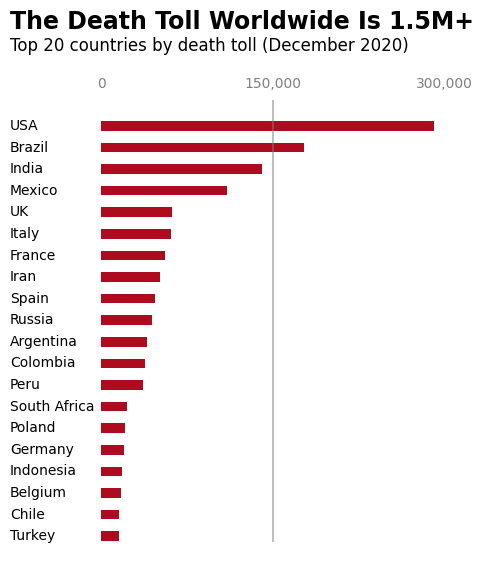

In [50]:

fix, ax = plt.subplots(figsize=(4.5,6))
ax.barh(death_toll['Country_Other'], 
       death_toll['Total_Deaths'],
       height=.45, color='#af0b1e')
ax.set_xticks([0, 150000, 300000])
for location in ['right', 'left', 'bottom', 'top']:
  ax.spines[location].set_visible(False)

ax.xaxis.tick_top()
ax.tick_params(top=False, left=False)
ax.tick_params(axis='x', colors='grey')
ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+',
        size=17, weight='bold')
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)',
        size=12)
ax.set_xticklabels(['0', '150,000', '300,000'])


# Assume the rest of the code is written
ax.set_yticklabels([]) # an empty list removes the labels
country_names = death_toll['Country_Other']
for i, country in zip(range(len(death_toll['Country_Other'])), country_names):
    ax.text(x=-80000, y=i-0.175, s=country)
ax.axvline(x=150000, ymin=0.045, c='grey', alpha=0.5)
plt.show()







Instead of using fix, ax = plt.subplot
we can have multiple ax by naming them and listing in them in (parentises)

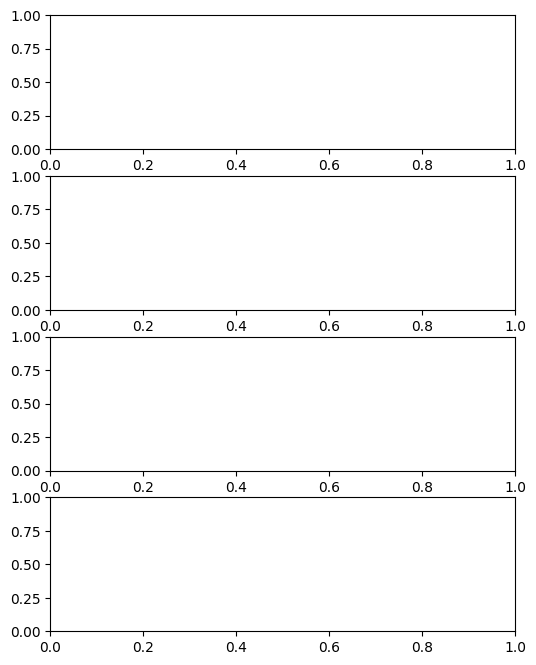

In [51]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
plt.show()

the different ax that we name are then used to create individual plots that we group together to tell a greater story.

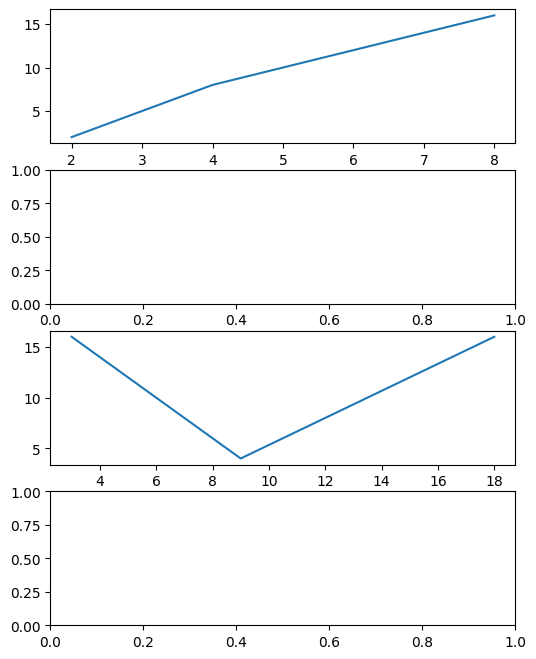

In [52]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
ax1.plot([2, 4, 8], [2, 8, 16])
ax3.plot([3, 9, 18], [16, 4, 16])
plt.show()

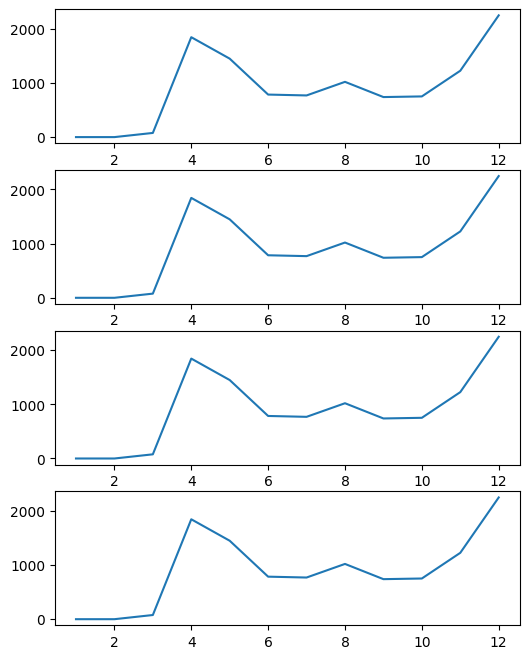

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

dtoll = pd.read_csv('/content/drive/MyDrive/Dataset/covid_avg_deaths.csv')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
ax1.plot(dtoll['Month'], dtoll['New_deaths'])
ax2.plot(dtoll['Month'], dtoll['New_deaths'])
ax3.plot(dtoll['Month'], dtoll['New_deaths'])
ax4.plot(dtoll['Month'], dtoll['New_deaths'])
plt.show()

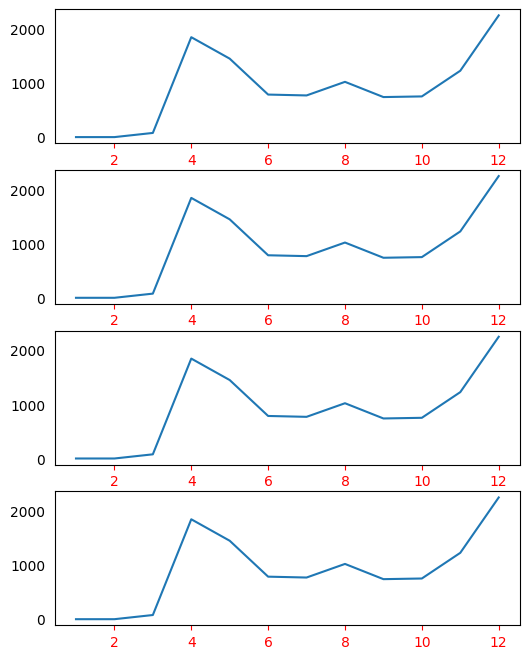

In [54]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(dtoll['Month'], dtoll['New_deaths'])
    ax.tick_params(top=False, left=False)
    ax.tick_params(axis='x', colors='red')
plt.show()

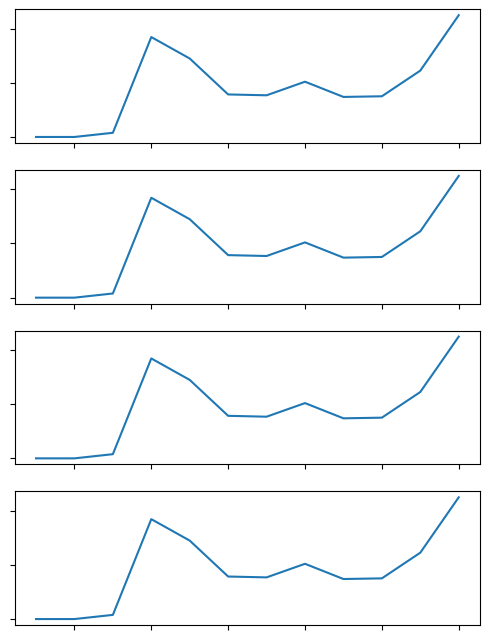

In [55]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(dtoll['Month'], dtoll['New_deaths'])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()

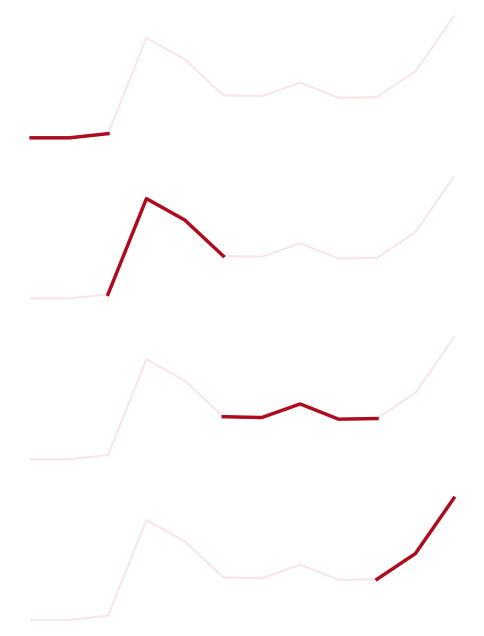

In [56]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(dtoll['Month'], dtoll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(dtoll['Month'][:3], dtoll['New_deaths'][:3],
            color='#af0b1e', linewidth=2.5)
ax2.plot(dtoll['Month'][2:6], dtoll['New_deaths'][2:6],
            color='#af0b1e', linewidth=2.5)
ax3.plot(dtoll['Month'][5:10], dtoll['New_deaths'][5:10],
            color='#af0b1e', linewidth=2.5)
ax4.plot(dtoll['Month'][9:12], dtoll['New_deaths'][9:12],
            color='#af0b1e', linewidth=2.5)

plt.show()

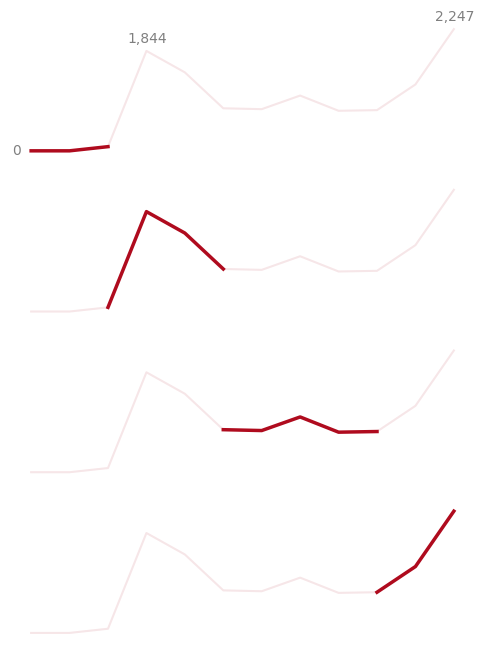

In [57]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(dtoll['Month'], dtoll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(dtoll['Month'][:3], dtoll['New_deaths'][:3],
            color='#af0b1e', linewidth=2.5)
ax2.plot(dtoll['Month'][2:6], dtoll['New_deaths'][2:6],
            color='#af0b1e', linewidth=2.5)
ax3.plot(dtoll['Month'][5:10], dtoll['New_deaths'][5:10],
            color='#af0b1e', linewidth=2.5)
ax4.plot(dtoll['Month'][9:12], dtoll['New_deaths'][9:12],
            color='#af0b1e', linewidth=2.5)

ax1.text(.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

plt.show()





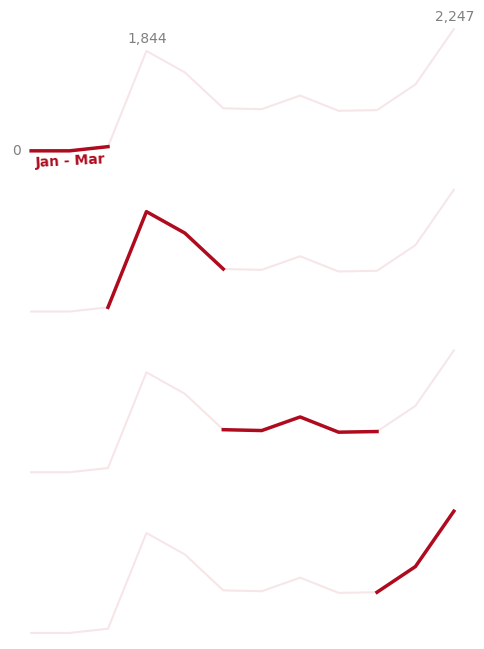

In [58]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(dtoll['Month'], dtoll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(dtoll['Month'][:3], dtoll['New_deaths'][:3],
            color='#af0b1e', linewidth=2.5)
ax2.plot(dtoll['Month'][2:6], dtoll['New_deaths'][2:6],
            color='#af0b1e', linewidth=2.5)
ax3.plot(dtoll['Month'][5:10], dtoll['New_deaths'][5:10],
            color='#af0b1e', linewidth=2.5)
ax4.plot(dtoll['Month'][9:12], dtoll['New_deaths'][9:12],
            color='#af0b1e', linewidth=2.5)

ax1.text(.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)


plt.show()





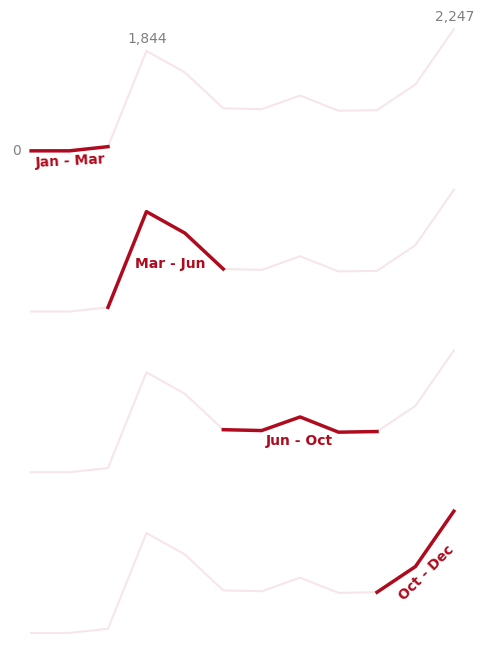

In [59]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(dtoll['Month'], dtoll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(dtoll['Month'][:3], dtoll['New_deaths'][:3],
            color='#af0b1e', linewidth=2.5)
ax2.plot(dtoll['Month'][2:6], dtoll['New_deaths'][2:6],
            color='#af0b1e', linewidth=2.5)
ax3.plot(dtoll['Month'][5:10], dtoll['New_deaths'][5:10],
            color='#af0b1e', linewidth=2.5)
ax4.plot(dtoll['Month'][9:12], dtoll['New_deaths'][9:12],
            color='#af0b1e', linewidth=2.5)

ax1.text(.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)

ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
         rotation=45)


plt.show()






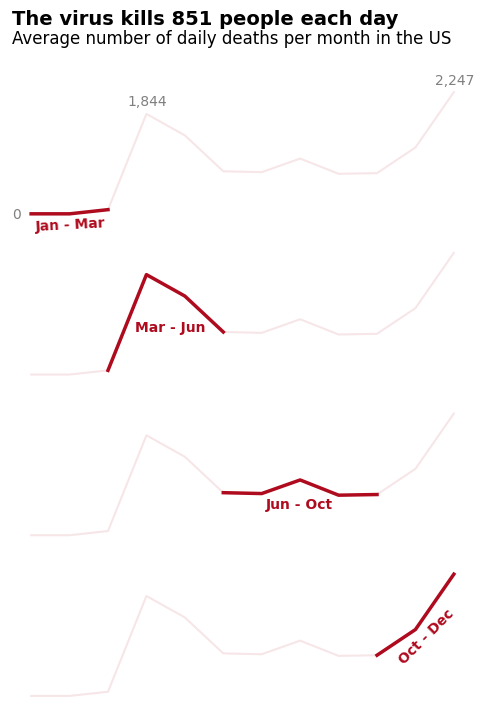

In [60]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(dtoll['Month'], dtoll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(dtoll['Month'][:3], dtoll['New_deaths'][:3],
            color='#af0b1e', linewidth=2.5)
ax2.plot(dtoll['Month'][2:6], dtoll['New_deaths'][2:6],
            color='#af0b1e', linewidth=2.5)
ax3.plot(dtoll['Month'][5:10], dtoll['New_deaths'][5:10],
            color='#af0b1e', linewidth=2.5)
ax4.plot(dtoll['Month'][9:12], dtoll['New_deaths'][9:12],
            color='#af0b1e', linewidth=2.5)

ax1.text(.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)

ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
         rotation=45)

ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 
plt.show()





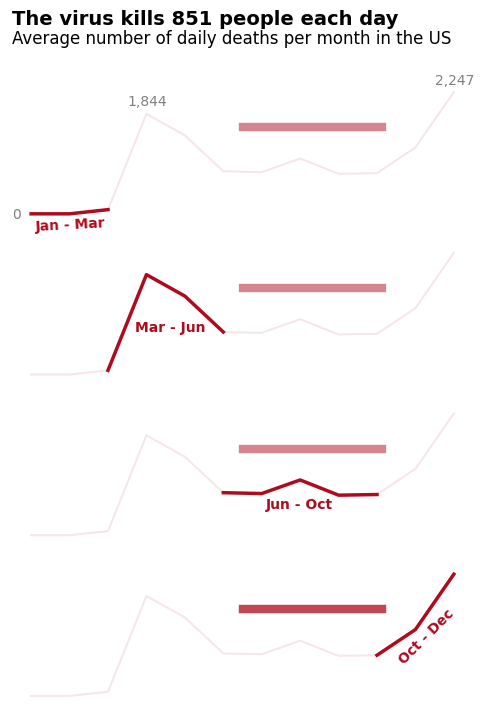

In [61]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(dtoll['Month'], dtoll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
           linewidth=6, color='#af0b1e', alpha=0.5)
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(dtoll['Month'][:3], dtoll['New_deaths'][:3],
            color='#af0b1e', linewidth=2.5)
ax2.plot(dtoll['Month'][2:6], dtoll['New_deaths'][2:6],
            color='#af0b1e', linewidth=2.5)
ax3.plot(dtoll['Month'][5:10], dtoll['New_deaths'][5:10],
            color='#af0b1e', linewidth=2.5)
ax4.plot(dtoll['Month'][9:12], dtoll['New_deaths'][9:12],
            color='#af0b1e', linewidth=2.5)

ax1.text(.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)

ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
         rotation=45)

ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 


ax.axhline(y=1600, xmin=0.5, xmax=0.8,
           linewidth=6, color='#af0b1e', alpha=0.5)


plt.show()





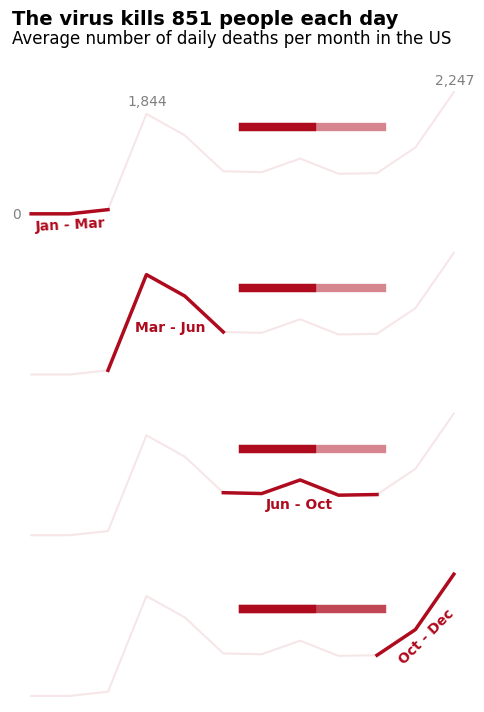

In [62]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(dtoll['Month'], dtoll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
           linewidth=6, color='#af0b1e', alpha=0.5)
    ax.axhline(y=1600, xmin=0.5, xmax=0.65,
              linewidth=6, color='#af0b1e')
    
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(dtoll['Month'][:3], dtoll['New_deaths'][:3],
            color='#af0b1e', linewidth=2.5)
ax2.plot(dtoll['Month'][2:6], dtoll['New_deaths'][2:6],
            color='#af0b1e', linewidth=2.5)
ax3.plot(dtoll['Month'][5:10], dtoll['New_deaths'][5:10],
            color='#af0b1e', linewidth=2.5)
ax4.plot(dtoll['Month'][9:12], dtoll['New_deaths'][9:12],
            color='#af0b1e', linewidth=2.5)

ax1.text(.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)

ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
         rotation=45)

ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 


ax.axhline(y=1600, xmin=0.5, xmax=0.8,
           linewidth=6, color='#af0b1e', alpha=0.5)


plt.show()






In [63]:
deaths = [2387, 126203, 227178, 295406]
proportions = [round(death/295406, 2) for death in deaths]
xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions]
print(proportions)
print(xmax_vals)

[0.01, 0.43, 0.77, 1.0]
[0.503, 0.629, 0.731, 0.8]


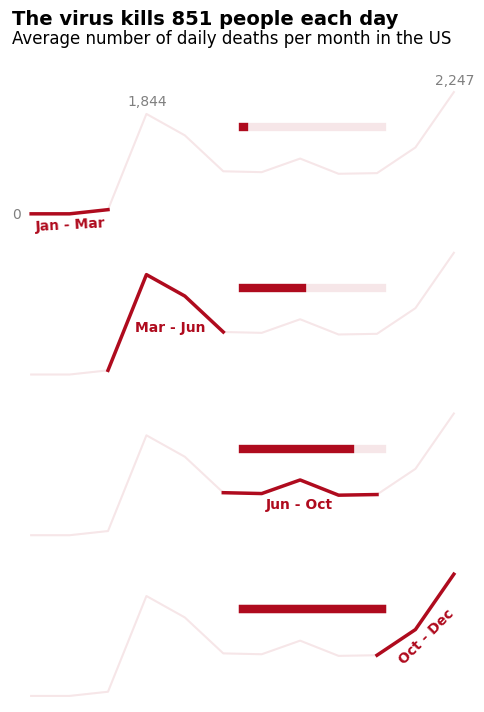

In [64]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(dtoll['Month'], dtoll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    
    
    
for ax, xmax in zip(axes, xmax_vals):
    
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e', alpha=0.1)

    
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#af0b1e')
    
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(dtoll['Month'][:3], dtoll['New_deaths'][:3],
            color='#af0b1e', linewidth=2.5)
ax2.plot(dtoll['Month'][2:6], dtoll['New_deaths'][2:6],
            color='#af0b1e', linewidth=2.5)
ax3.plot(dtoll['Month'][5:10], dtoll['New_deaths'][5:10],
            color='#af0b1e', linewidth=2.5)
ax4.plot(dtoll['Month'][9:12], dtoll['New_deaths'][9:12],
            color='#af0b1e', linewidth=2.5)

ax1.text(.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)

ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
         rotation=45)

ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 


ax.axhline(y=1600, xmin=0.5, xmax=0.8,
           linewidth=6, color='#af0b1e', alpha=0.5)


plt.show()








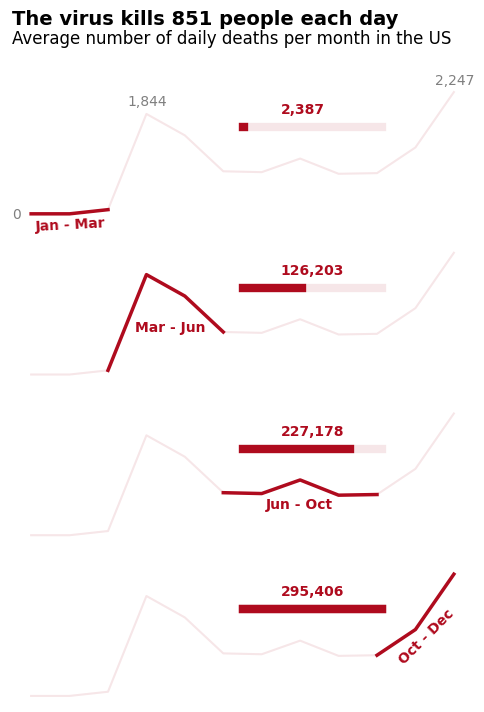

In [71]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(dtoll['Month'], dtoll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    
    
    
for ax, xmax, death in zip(axes, xmax_vals, deaths):
    
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e', alpha=0.1)

    
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#af0b1e')
    
    ax.text(7.5, 1850, format(death, ','),
            color='#af0b1e', weight='bold')
    
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)

ax1.plot(dtoll['Month'][:3], dtoll['New_deaths'][:3],
            color='#af0b1e', linewidth=2.5)
ax2.plot(dtoll['Month'][2:6], dtoll['New_deaths'][2:6],
            color='#af0b1e', linewidth=2.5)
ax3.plot(dtoll['Month'][5:10], dtoll['New_deaths'][5:10],
            color='#af0b1e', linewidth=2.5)
ax4.plot(dtoll['Month'][9:12], dtoll['New_deaths'][9:12],
            color='#af0b1e', linewidth=2.5)

ax1.text(.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)

ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)

ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
         rotation=45)

ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 


ax.axhline(y=1600, xmin=0.5, xmax=0.8,
           linewidth=6, color='#af0b1e', alpha=0.5)




plt.show()








